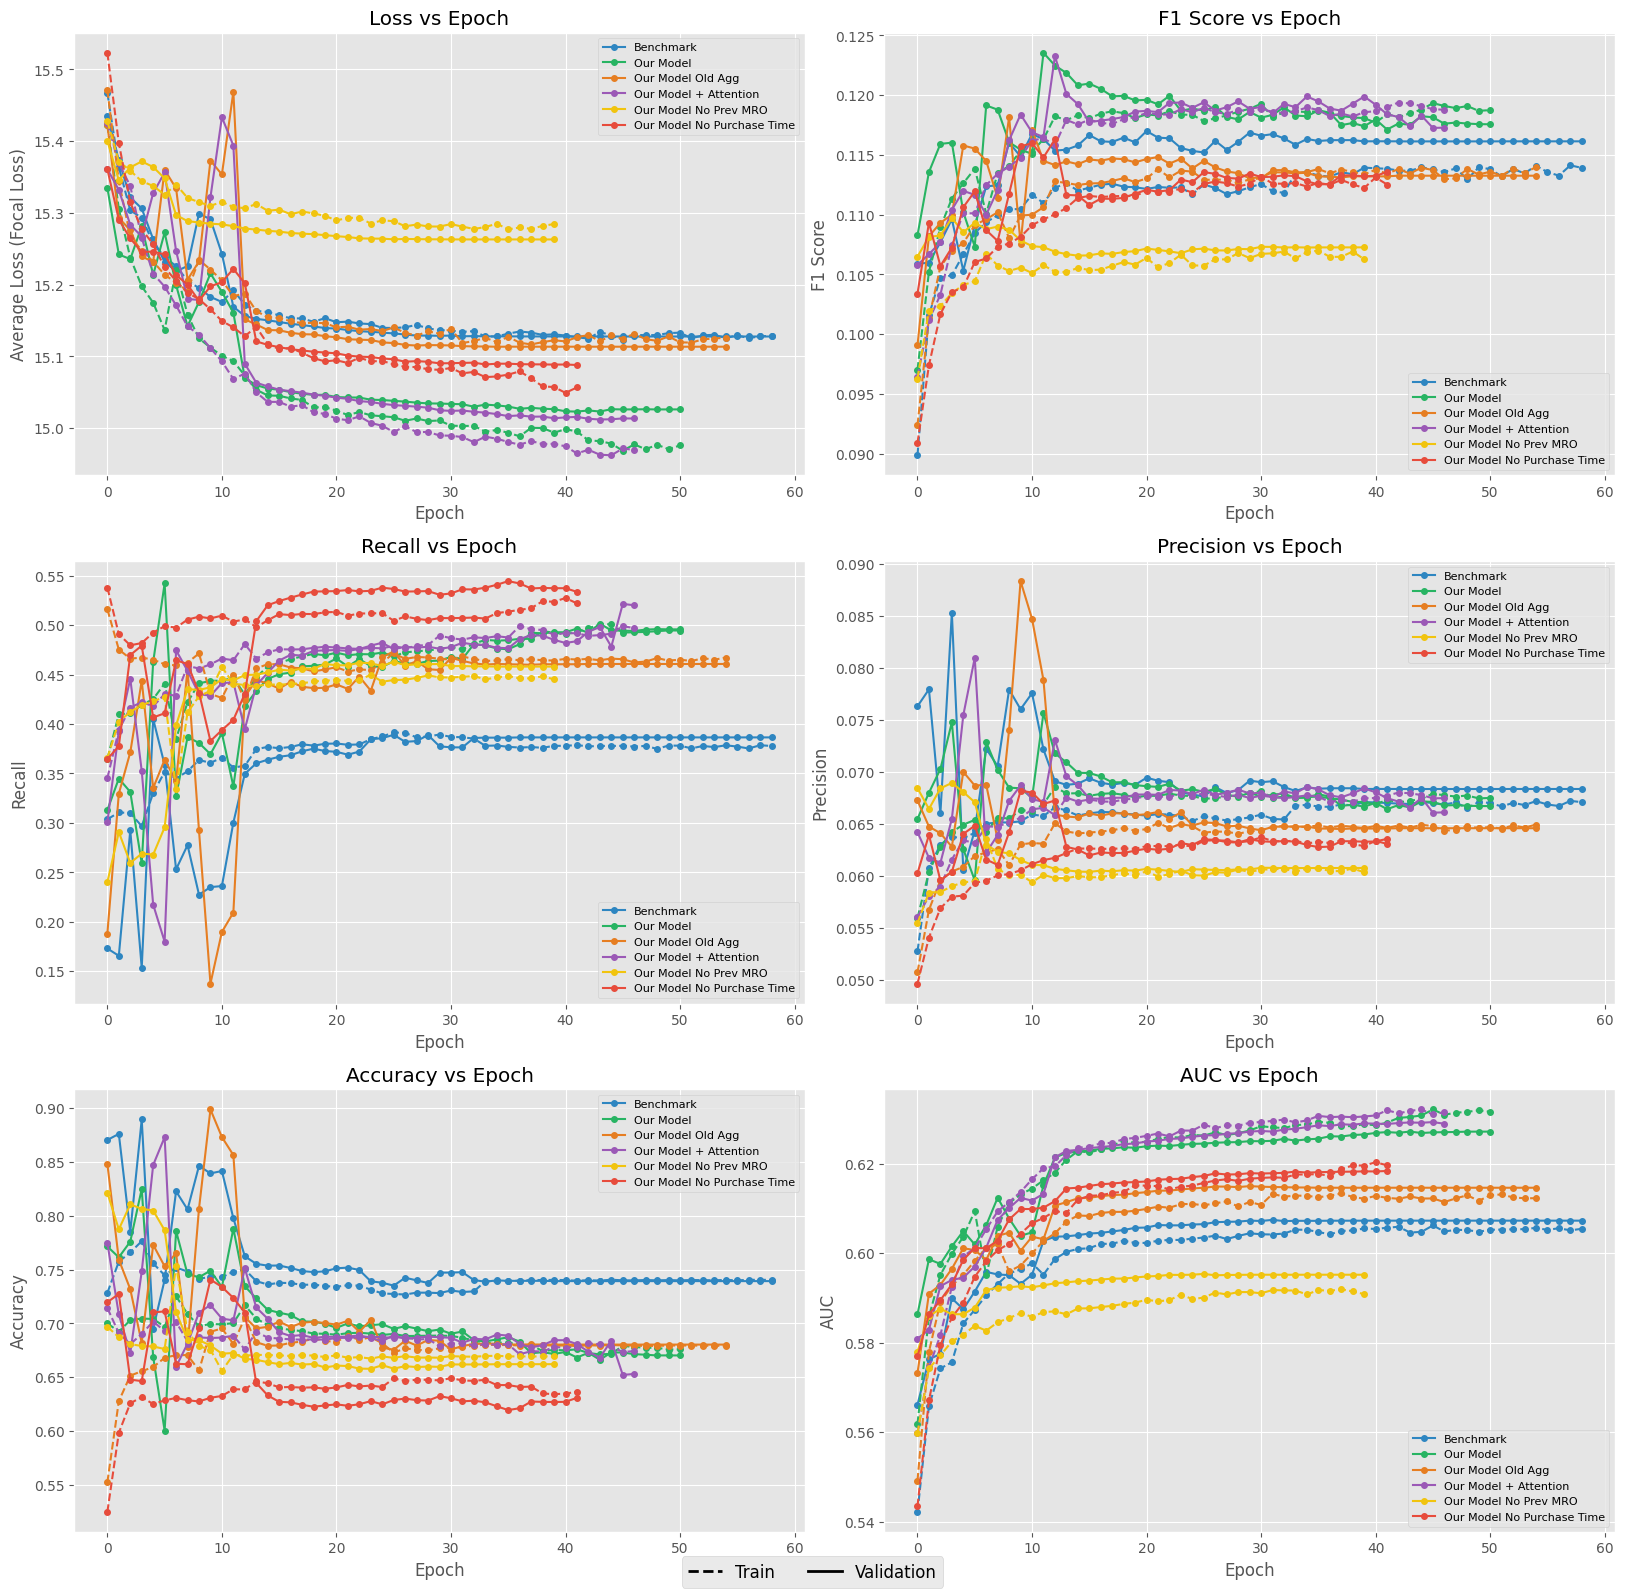

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define model paths and names
model_paths = {
    "Benchmark": "./output/lstm/benchmark/ray_train_log.csv",
    "Our Model": "./output/lstm/our_model/ray_train_log.csv",
    "Our Model Old Agg": "./output/lstm/our_model_old_agg/ray_train_log.csv",
    "Our Model + Attention": "./output/lstm/our_model_transformer/ray_train_log.csv",
    "Our Model No Prev MRO": "./output/lstm/our_model_without_prev_mro/ray_train_log.csv",
    "Our Model No Purchase Time": "./output/lstm/our_model_without_purchase_time/ray_train_log.csv",
}

# Load data for all models
model_data = {}
for name, path in model_paths.items():
    model_data[name] = pd.read_csv(path)

plt.style.use("ggplot")
# Set up the figure layout: 3 rows, 2 columns (6 subplots total)
# fig, axes = plt.subplots(3, 2, figsize=(27, 24))
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# Custom color list (corresponding to each model)
colors = [
    "#2E86C1",
    "#28B463",
    "#E67E22",
    "#9B59B6",
    "#F1C40F",
    "#E74C3C",
]
# markers = ["o", "s", "^", "v", "D"]
markers = ["o", "o", "o", "o", "o", "o"]
linestyles = ["-", "--"]


def plot_metric(
    ax,
    metric_name,
    title,
    ylabel,
    add_train: bool,
    add_valid: bool,
):

    for idx, (model_name, data) in enumerate(model_data.items()):
        if add_train:
            ax.plot(
                data["epoch"],
                data[f"train_{metric_name}"],
                color=colors[idx],
                marker=markers[idx],
                linestyle="--",
                label=model_name,
                markersize=4,
            )
        if add_valid:
            ax.plot(
                data["epoch"],
                data[f"val_{metric_name}"],
                color=colors[idx],
                marker=markers[idx],
                linestyle="-",
                label=model_name,
                markersize=4,
            )

    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(ylabel)
    ax.grid(True)

    # Add a legend to each subplot, showing each model only once
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicates
    ax.legend(by_label.values(), by_label.keys(), fontsize=8)


add_train = True
add_valid = True
# Plot each metric

plot_metric(
    axes[0, 0],
    "average_loss",
    "Loss vs Epoch",
    "Average Loss (Focal Loss)",
    add_train,
    add_valid,
)
plot_metric(
    axes[0, 1],
    "f1",
    "F1 Score vs Epoch",
    "F1 Score",
    add_train,
    add_valid,
)
plot_metric(
    axes[1, 0],
    "recall",
    "Recall vs Epoch",
    "Recall",
    add_train,
    add_valid,
)
plot_metric(
    axes[1, 1],
    "precision",
    "Precision vs Epoch",
    "Precision",
    add_train,
    add_valid,
)
plot_metric(
    axes[2, 0],
    "accuracy",
    "Accuracy vs Epoch",
    "Accuracy",
    add_train,
    add_valid,
)
plot_metric(
    axes[2, 1],
    "auc",
    "AUC vs Epoch",
    "AUC",
    add_train,
    add_valid,
)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Leave space for the legend

# Create custom legend for train/val (dashed/solid lines)
legend_elements = [
    Line2D([0], [0], color="black", lw=2, ls="--", label="Train"),
    Line2D([0], [0], color="black", lw=2, ls="-", label="Validation"),
]

# Add the legend to the bottom of the figure
fig.legend(handles=legend_elements, loc="lower center", ncol=2, fontsize=12)

plt.show()

---